# Weighted Least Squares Method For Parameter Estimation


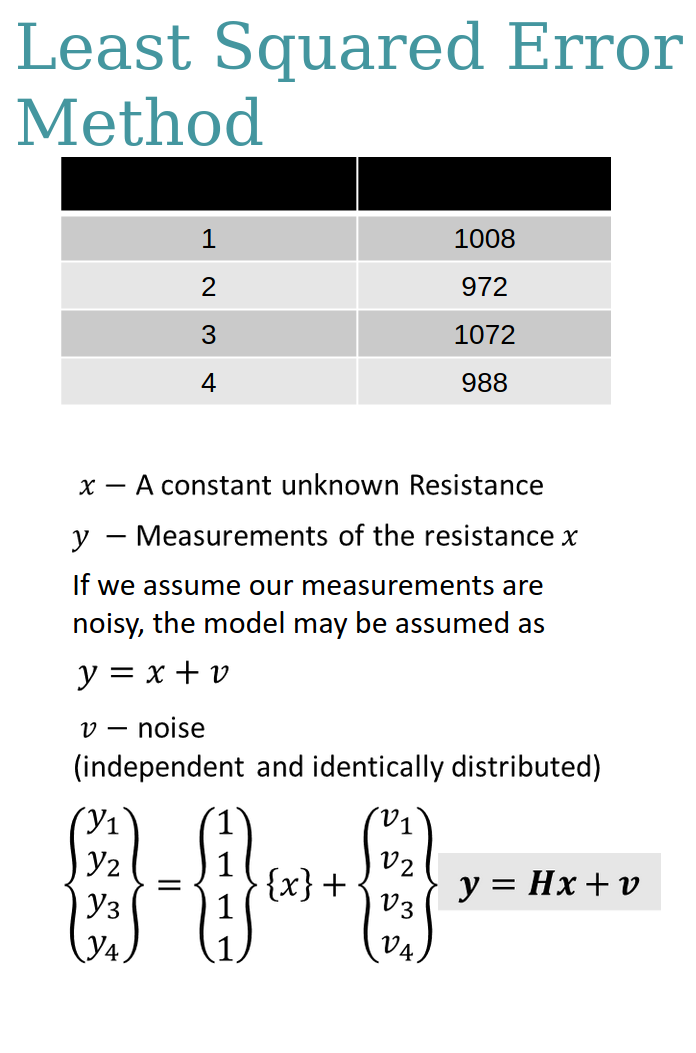

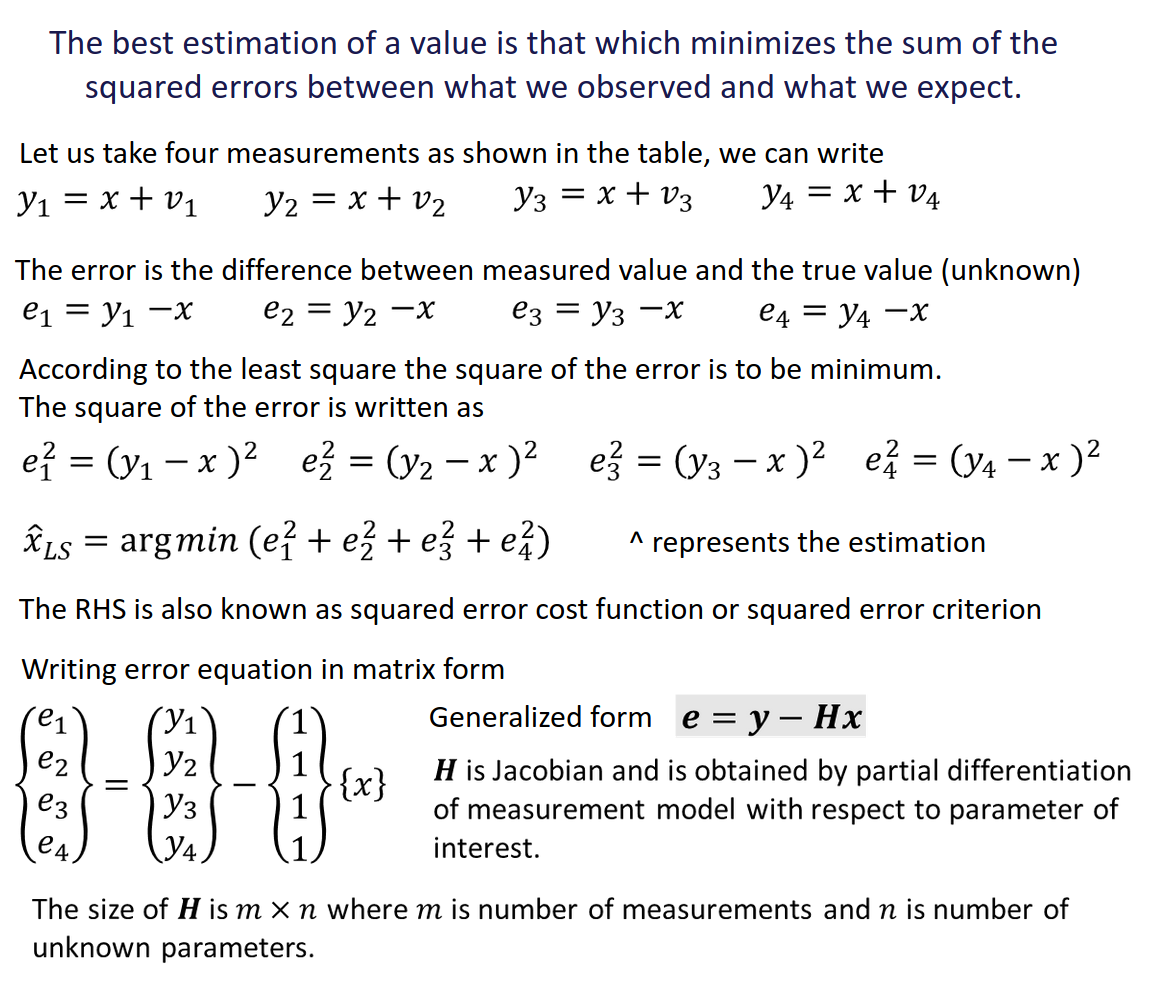

In [25]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sympy import Symbol, Derivative
list_of_params = []
def TakeInputs(measurements_rows,measurements_columns):
    y = np.zeros((measurements_rows,measurements_columns))  #y = measurements matrix m x n
    H = np.zeros((measurements_rows,measurements_columns))  #H = jacobian matrix relating x and y dim = m x n
    x = np.zeros((1,measurements_columns))                  #x = parameter to be estimated dim = 1 x n
    
    
    for i in range(measurements_columns):
        list_of_params.append(input("Enter Name of Parameter {}:".format(i+1)))
        
    for j in range(measurements_columns):
        for i in range(measurements_rows):
            y[i,j] = float(input("Enter Measurement {} of {}: ".format(i+1,list_of_params[j])))
        print("y = ",y)
    for i in range(measurements_columns):
        for j in range(measurements_rows):
            H[j,i] = float(input("Enter H matrix(Partial Derivative) value of element [{}],[{}]: ".format(j,i)))
    return (x,H,y)

In [26]:
def CheckMatrices(x,H,y):
    print("parameters to be Estimated(x) = :{}".format(list_of_params))
    print("H matrix = {}, y = {}".format(H,y))

In [27]:
def R_matrix():
    R = np.zeros((measurements_rows,measurements_rows))
    for i in range(measurements_rows):
        for j in range(measurements_rows):
            R[i][j] = float(input("Enter Value of R[{}][{}]: ".format(i,j)))
    print(R)
    return R

In [28]:

def CalculateWeightedLeastSquaresSol(H,y):
    H_transpose = np.transpose(H) 
    H_t = H_transpose
    H_t_into_H = np.matmul(H_transpose,H)
    H_t_into_H_inv = np.linalg.inv(H_t_into_H)
    H_t_into_H_inv_into_H_t = np.matmul(H_t_into_H_inv,H_transpose)
    x = np.matmul(H_t_into_H_inv_into_H_t,y)

    R = R_matrix()
    R_inv = np.linalg.inv(R)
    H_t_R_inv = np.matmul(H_t,R_inv)
    H_t_R_inv_H = np.matmul(H_t_R_inv,H)
    H_t_R_inv_H_T = np.linalg.inv(H_t_R_inv_H)
    Result = np.matmul(H_t_R_inv_H_T,H_t)
    Result = np.matmul(Result,R_inv)
    Result = np.matmul(Result,y)
    for i in range(measurements_columns):
        print("Best Estimate of {} is = {}".format(list_of_params[i],np.squeeze(Result[i])))

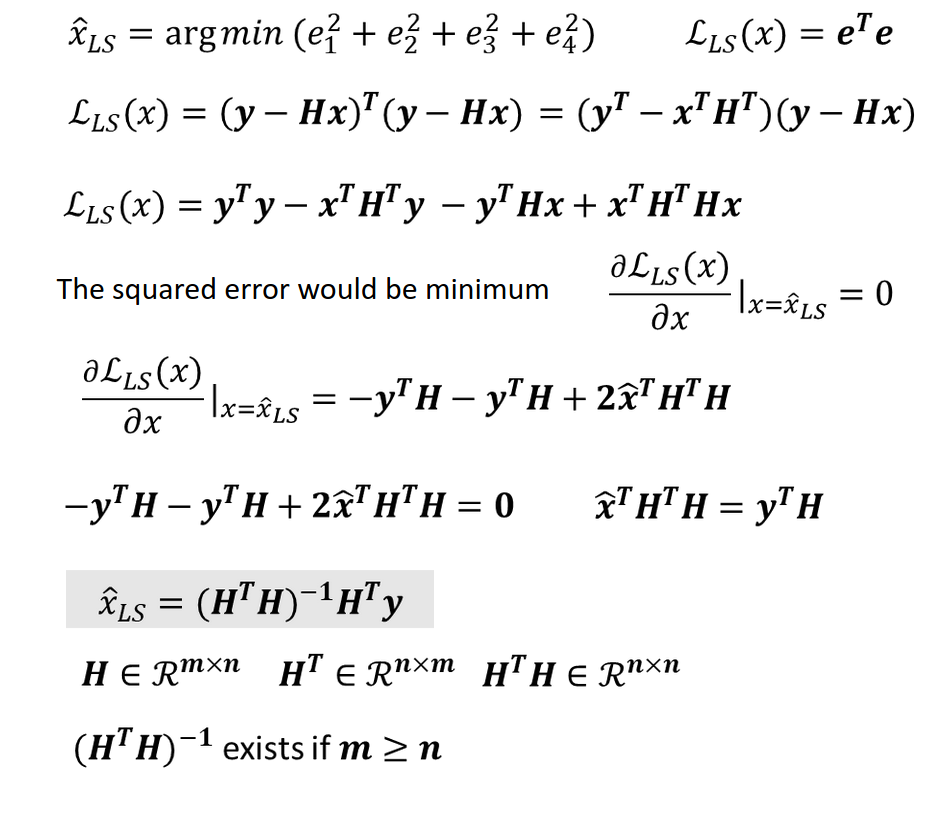

In [29]:
#Example of  How to calculate Partial Derivative !!! NOT USED IN THIS CODE
def PartialDerivative():
    x= Symbol('x')
    y= Symbol('y')
    
    function= x**2 * y**3 + 12*y**4
    
    partialderiv= Derivative(function, x)
    partialderiv.doit()
# Refrence from
# http://www.learningaboutelectronics.com/Articles/How-to-find-the-partial-derivative-of-a-function-in-Python.php


In [30]:
if __name__ == "__main__":
    
    measurements_rows = int(input("Enter Number of Measurements Taken: "))
    measurements_columns = int(input("Enter Number of Parameters to be Estimated: "))
    if measurements_rows < measurements_columns:
        print("Cannot Compute Estimate Please Take More Measurements")
    

    (x,H,y) = TakeInputs(measurements_rows,measurements_columns)
    CheckMatrices(x,H,y)
    CalculateWeightedLeastSquaresSol(H,y)            

Enter Number of Measurements Taken: 4
Enter Number of Parameters to be Estimated: 1
Enter Name of Parameter 1:I
Enter Measurement 1 of I: 1078
Enter Measurement 2 of I: 972
Enter Measurement 3 of I: 1058
Enter Measurement 4 of I: 988
y =  [[1078.]
 [ 972.]
 [1058.]
 [ 988.]]
Enter H matrix(Partial Derivative) value of element [0],[0]: 1
Enter H matrix(Partial Derivative) value of element [1],[0]: 1
Enter H matrix(Partial Derivative) value of element [2],[0]: 1
Enter H matrix(Partial Derivative) value of element [3],[0]: 1
parameters to be Estimated(x) = :['I']
H matrix = [[1.]
 [1.]
 [1.]
 [1.]], y = [[1078.]
 [ 972.]
 [1058.]
 [ 988.]]
Enter Value of R[0][0]: 400
Enter Value of R[0][1]: 36
Enter Value of R[0][2]: 0
Enter Value of R[0][3]: 0
Enter Value of R[1][0]: 0
Enter Value of R[1][1]: 36
Enter Value of R[1][2]: 0
Enter Value of R[1][3]: 0
Enter Value of R[2][0]: 0
Enter Value of R[2][1]: 0
Enter Value of R[2][2]: 400
Enter Value of R[2][3]: 0
Enter Value of R[3][0]: 0
Enter Value

# An Example

In [ ]:
1